## Reading Data and Getting Summaries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

crime = pd.read_csv('daily-inmates-in-custody.csv')
crime.tail()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
8188,20195614,2018-07-26T12:45:35,NaN,MED,N,O,M,36.0,DE,N,N,130.75,N
8189,20189226,2018-07-26T13:33:39,NaN,MED,N,O,M,23.0,DE,N,N,220.39,N
8190,20144177,2018-07-27T01:41:26,NaN,NaN,N,O,F,30.0,DE,N,N,155.25,N
8191,20271,2018-07-26T11:34:38,NaN,NaN,N,B,F,55.0,DE,N,N,140.20,N
8192,20057681,2018-07-26T22:10:34,NaN,MED,N,W,M,37.0,DPV,N,N,NaN,N


In [23]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 13 columns):
INMATEID              8193 non-null int64
ADMITTED_DT           8193 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8069 non-null object
BRADH                 8193 non-null object
RACE                  8173 non-null object
GENDER                8173 non-null object
AGE                   8183 non-null float64
INMATE_STATUS_CODE    8193 non-null object
SEALED                8193 non-null object
SRG_FLG               8193 non-null object
TOP_CHARGE            7187 non-null object
INFRACTION            8193 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 832.2+ KB


### Univariate Data

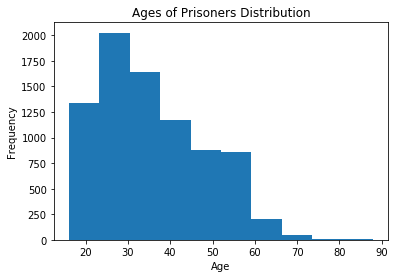

In [27]:
df = crime["AGE"].dropna()
df.plot.hist()
plt.title("Ages of Prisoners Distribution")
plt.xlabel("Age")
plt.savefig("AgeDistribution.png")

In [63]:
df = crime["AGE"].dropna()
sum(df.between(20,40))/len(df)

0.634241720640352

#### It is clear that most of the prisoners incarcerated are in their 20-40's as together they make up 63.42% of the prison population.  

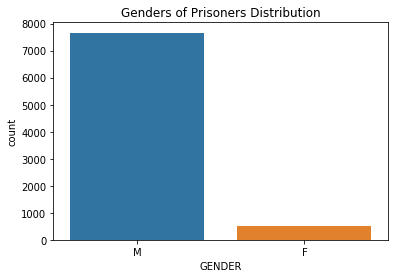

In [67]:
sns.countplot(x = "GENDER", data = crime)
plt.title("Genders of Prisoners Distribution")
plt.savefig("GenderDistribution.png")

In [68]:
df = crime["GENDER"].dropna()
df = df.map({'M' :1, 'F' :0})
sum(df)/len(df)

0.9374770586076104

#### There is an overwhelming gender inequality in prison with 93.75% of the prison population being male. 

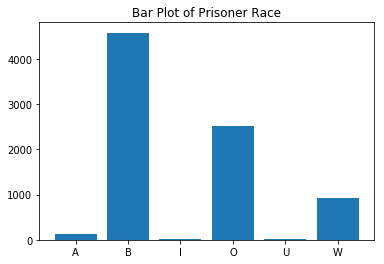

<Figure size 432x288 with 0 Axes>

In [57]:
df = crime["RACE"].dropna()
race_df = pd.get_dummies(df)
race_df.head()
heights = []
bars = ['A', 'B', 'I', 'O', 'U', 'W']
for i in list(race_df.columns.values):
    heights.append(race_df[i].sum())
y_pos = np.arange(len(bars))
figure = plt.bar(y_pos, heights)
plt.xticks(y_pos, bars)
plt.title("Bar Plot of Prisoner Race")
plt.show()

plt.savefig('race_bar.png')

In [60]:
df = crime["RACE"].dropna()
df = df.map({'B' :1, 'A' :0, 'I' :0, 'O' :0, 'U' :0, 'W' :0})
sum(df)/len(df)

0.5602593906766181

#### It is clear to see that the majority of the prisoners are African American as they make up 56.03% of the prison population. 

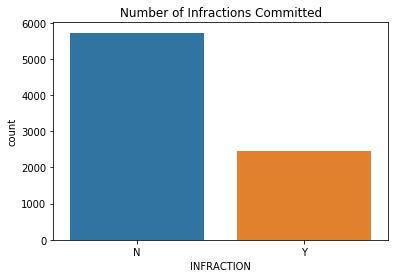

In [30]:
sns.countplot(x = "INFRACTION", data = crime)
plt.title("Number of Infractions Committed")
plt.savefig("NumInfractions.png")

In [47]:
df = crime['INFRACTION'].dropna()
df = df.map({'Y' :1, 'N' :0})
sum(df)/len(df)

0.30086659343341876

#### It is clear to see that most of the prisoners do not have an infraction. Only 30.09% of the prisoners have an infraction

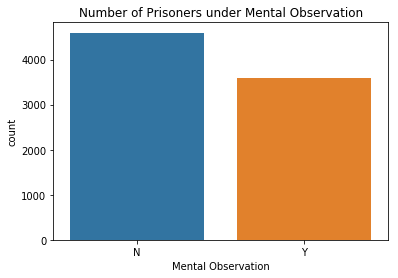

In [86]:
sns.countplot(x = "BRADH", data = crime)
plt.title("Number of Prisoners under Mental Observation")
plt.xlabel("Mental Observation")
plt.savefig("MentalObservation.png")

In [88]:
df = crime['BRADH'].dropna()
df = df.map({'Y' :1, 'N' :0})
sum(df)/len(df)

0.43891126571463446

#### It is clear to see that a lot of prisoners (43.89%) are under mental observation. 

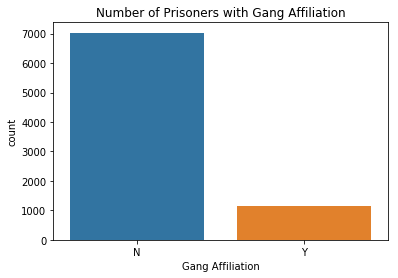

In [85]:
sns.countplot(x = "SRG_FLG", data = crime)
plt.title("Number of Prisoners with Gang Affiliation")
plt.xlabel("Gang Affiliation")
plt.savefig("GangAffiliation.png")

In [89]:
df = crime['SRG_FLG'].dropna()
df = df.map({'Y': 1, 'N': 0})
sum(df)/len(df)

0.14195044550225802

#### It is clear to see that not many prisoners have gang affiliations. Only 14.20% of prisoners have gang affiliations. 

## Bivariate Data

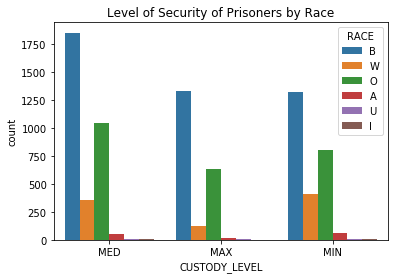

In [16]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'RACE', data = crime)
plt.title('Level of Security of Prisoners by Race')
plt.savefig('securityvsrace.png')

#### Most prisoners exist in the medium level of security with a similar ratio between the races. 

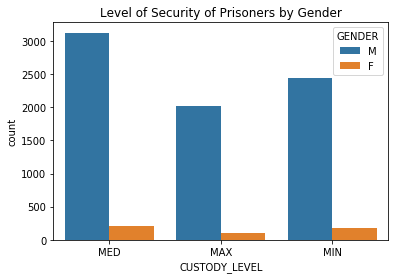

In [26]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = crime)
plt.title('Level of Security of Prisoners by Gender')
plt.savefig('securityvsgender.png')

#### This graph also supports the hypothesis that most of the prison population, for both genders, exist in the medium level of security 

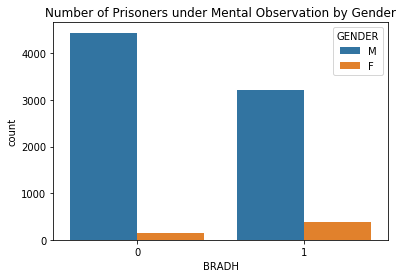

In [70]:
sns.countplot(x = "BRADH", hue = 'GENDER', data = crime)
plt.title("Number of Prisoners under Mental Observation by Gender")
plt.savefig("MentalObservationbyGender.png")

#### It is clear to see that more women are under mental observation than men. 

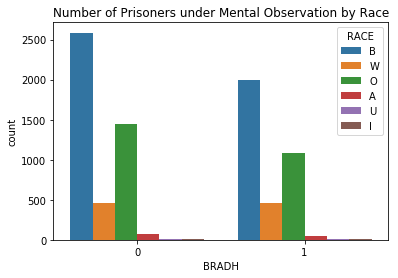

In [72]:
sns.countplot(x = "BRADH", hue = 'RACE', data = crime)
plt.title("Number of Prisoners under Mental Observation by Race")
plt.savefig("MentalObservationRace.png")

#### There exists a similar ratio between the races in and out of mental observation. 

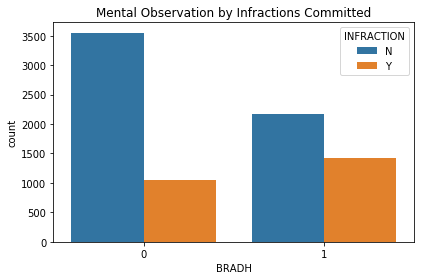

In [76]:
sns.countplot(x = "BRADH", hue = "INFRACTION", data = crime)
plt.title("Mental Observation by Infractions Committed")
plt.tight_layout()
plt.savefig("MentalObservationInfraction.png")

#### More prisoners who have committed an infraction are also under mental observation

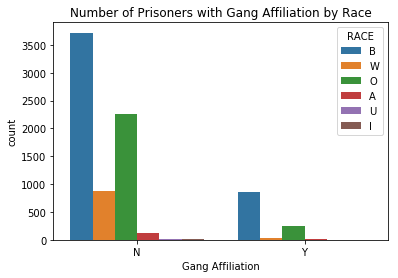

In [92]:
sns.countplot(x = "SRG_FLG", hue = "RACE", data = crime)
plt.title("Number of Prisoners with Gang Affiliation by Race")
plt.xlabel("Gang Affiliation")
plt.savefig("GangAffiliationRace.png")

#### There exists a similar ratio between races and having gang affiliations. 

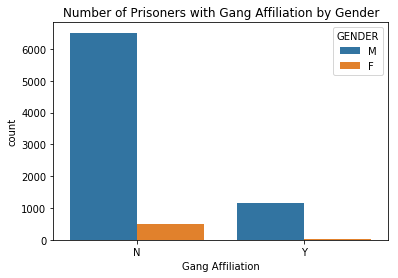

In [93]:
sns.countplot(x = "SRG_FLG", hue = "GENDER", data = crime)
plt.title("Number of Prisoners with Gang Affiliation by Gender")
plt.xlabel("Gang Affiliation")
plt.savefig("GangAffiliationGender.png")

In [ ]:
#### There exists a similar ratio between genders and having gang affiliations.  